<a href="https://colab.research.google.com/github/mynameisyouji/MLstudy/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%ED%8A%B9%EA%B0%95_%EC%88%99%EC%A0%9C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
df=pd.read_csv('/gdrive/MyDrive/data/winequality_red.csv')
df.head(5)

Mounted at /gdrive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [69]:
print(df.corr())
print(df.dtypes)
print(df.shape)

                      fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.124052
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.390558
citric acid                0.671703         -0.552496  ...  0.109903  0.226373
residual sugar             0.114777          0.001918  ...  0.042075  0.013732
chlorides                  0.093705          0.061298  ... -0.221141 -0.128907
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.050656
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.185100
density                    0.668047          0.022026  ... -0.496180 -0.174919
pH                        -0.682978          0.234937  ...  0.205633 -0.057731
sulphates                  0.183006         -0.260987  ...  0.093595  0.251397
alcohol                   -0.061668         -0.202288  ...  1.000000  0.476166
quality                    0.124052         -0.39055

In [70]:
#train set과 test set으로 나누기
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(df.iloc[:,0:11], df.iloc[:,11], test_size=0.3, random_state=128)

RMSE: 0.6835492330940495
R2: 0.2901941577683439
[15266.20001419]


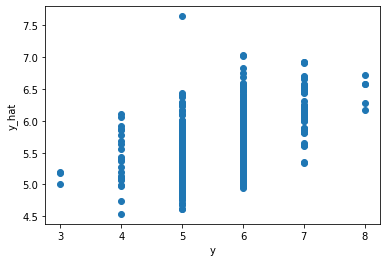

In [71]:
#Linear regression 모델 만들기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
# print(lr_pred[:100])
plt.scatter(x=tsty,y=lr_pred)
plt.xlabel('y')
plt.ylabel('y_hat')

from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred, tsty)))
print('R2:', metrics.r2_score(tsty, lr_pred))
print(np.correlate(tsty,lr_pred))

RMSE_lasso: 0.8009055790246365
R2_lasso: 0.025543163858618878
Correlate_lasso: [15192.06724416]


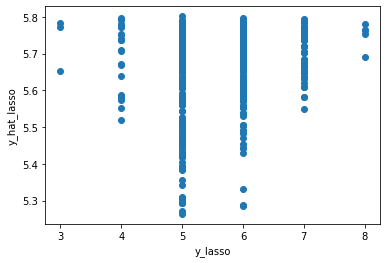

In [72]:
#LASSO regression 모델 만들기

from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)

plt.scatter(x=tsty, y=lr_pred_lasso)
plt.xlabel('y_lasso')
plt.ylabel('y_hat_lasso')

print('RMSE_lasso:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso, tsty)))
print('R2_lasso:', metrics.r2_score(tsty, lr_pred_lasso))
print('Correlate_lasso:', np.correlate(tsty, lr_pred_lasso))

RMSE_ridge: 0.6862077481937757
R2_ridge: 0.28466215201931844
Correlate_ridge: [15266.48203713]


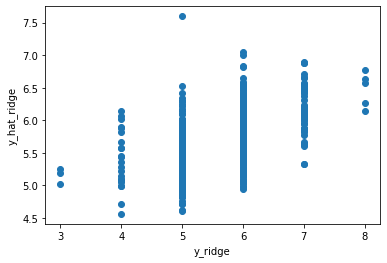

In [73]:
#Ridge regression 모델 만들기

from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)

plt.scatter(x=tsty, y=lr_pred_ridge)
plt.xlabel('y_ridge')
plt.ylabel('y_hat_ridge')

print('RMSE_ridge:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge, tsty)))
print('R2_ridge:', metrics.r2_score(tsty, lr_pred_ridge))
print('Correlate_ridge:', np.correlate(tsty, lr_pred_ridge))

In [74]:
print('LR:',model.coef_)
print()
print('Lasso:',model_lasso.coef_)
print()
print('Ridge:', model_ridge.coef_)

LR: [ 3.10926353e-02 -1.09180680e+00 -2.34607186e-01  2.23596034e-02
 -1.23865350e+00  3.13708103e-03 -3.14382758e-03 -2.36794974e+01
 -3.77766614e-01  8.67094581e-01  3.02815520e-01]

Lasso: [ 0.        -0.         0.         0.        -0.         0.
 -0.0036098 -0.        -0.         0.         0.       ]

Ridge: [ 0.01200809 -1.08651364 -0.21526556  0.01116997 -0.80606057  0.00336997
 -0.00313686 -0.0181154  -0.43139012  0.76361599  0.3304082 ]


In [75]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred, tsty)))
print('R2:', metrics.r2_score(tsty, lr_pred))
print()
print('RMSE_lasso:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso, tsty)))
print('R2_lasso:', metrics.r2_score(tsty, lr_pred_lasso))
print()
print('RMSE_ridge:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge, tsty)))
print('R2_ridge:', metrics.r2_score(tsty, lr_pred_ridge))

RMSE: 0.6835492330940495
R2: 0.2901941577683439

RMSE_lasso: 0.8009055790246365
R2_lasso: 0.025543163858618878

RMSE_ridge: 0.6862077481937757
R2_ridge: 0.28466215201931844
